In [1]:
import numpy as np
import sys
import matplotlib.pyplot as plt
import matplotlib.animation
import yaml
import cv2
from scipy.spatial.transform import Rotation
from matplotlib.patches import Rectangle
from tqdm import tqdm
import argparse

sys.path.append('/home/schiavazza/code/hpe/hpe-core/datasets/')
sys.path.append('/local_code/hpe-core/datasets/')

from vicon_processing.src.projection import ProjectionHelper
from vicon_processing.src.data_helpers import DvsLabeler, DvsHelper, C3dHelper
from vicon_processing.src import vis_utils, utils

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
def obj_delay(delay, label_start):
    r = 2
    # import the DVS data
    dvs_file_path = "/home/schiavazza/data/hpe/vicon_dataset/processed/simon/mix_s1/atis-d/"
    dvs_helper = DvsHelper(dvs_file_path)
    # read the labeled 2d points
    dvs_helper.read_points_labels("/home/schiavazza/data/hpe/vicon_dataset/processed/simon/mix_s1/atis_d_frames/labeled_points.yml");
    # extract the time of the labeled points
    print(len(dvs_helper.labeled_points['points']))
    s = max(0, label_start-r)
    e = min(len(dvs_helper.labeled_points['points']), label_start+r)

    labels_times = np.array(dvs_helper.labeled_points['times'][:])

    print(labels_times)
    # labels_times = [0.0]
    labels = list(dvs_helper.labeled_points['points'][0].keys())
    print(labels)


    # load c3d vicon data
    c3d_file_path = "/home/schiavazza/data/hpe/vicon_dataset/processed/simon/mix_s1.c3d"
    c3d_helper = C3dHelper(c3d_file_path, delay=delay, camera_markers=True)
    print(c3d_helper.reader.point_labels)
    c3d_helper.reader.frame_count

    vicon_labeled_frames = c3d_helper.get_frame_time(labels_times)
    print(c3d_helper.frame_times)
    vicon_points = c3d_helper.get_vicon_points_interpolated(dvs_helper.labeled_points)
    vicon_points_mark = c3d_helper.transform_points_to_marker_frame(vicon_points)
    # vicon_points_mark = vicon_points
    c3d_helper.markers_T
    print(f"times from dvs labels: {dvs_helper.labeled_points['times']}")
    print(f"times from vicon labels: {vicon_points_mark['times']}")
    dvs_helper.labeled_points['times']
    vicon_points_mark['times']
    proj_helper = ProjectionHelper(vicon_points_mark, dvs_helper.labeled_points)
    proj_helper.import_camera_calbration("/home/schiavazza/data/hpe/vicon_dataset/processed/simon/calib-d.txt");
    proj_helper.image_points

    # find transform
    T, result = proj_helper._find_R_t_opencv()
    print(result)

    return result

In [3]:
def opt_delay(l_start):
    delays = np.linspace(0.2, 0.30, 50)
    res = []
    for d in delays:
        r = obj_delay(d, l_start)
        if r > 100: r = 100
        res.append(r)
    res = np.array(res)

    return res, delays

In [4]:
res, delays = opt_delay(5)

12
[ 0.60301508  0.90452261  2.48743719  4.74874372  5.95477387  7.7638191
  8.74371859  9.49748744 10.85427136 12.13567839 12.88944724 13.64321608]
['P11:CLAV', 'P11:LFIN']


/home/schiavazza/.local/lib/python3.10/site-packages/c3d/c3d.py:1219: UserWarning: No analog data found in file.
  warnings.warn('No analog data found in file.')


['camera:cam_right              ' 'camera:cam_back               '
 'camera:cam_left               ' 'P11:LFHD                      '
 'P11:RFHD                      ' 'P11:LBHD                      '
 'P11:RBHD                      ' 'P11:C7                        '
 'P11:T10                       ' 'P11:CLAV                      '
 'P11:STRN                      ' 'P11:RBAK                      '
 'P11:LSHO                      ' 'P11:LUPA                      '
 'P11:LELB                      ' 'P11:LFRM                      '
 'P11:LWRA                      ' 'P11:LWRB                      '
 'P11:LFIN                      ' 'P11:RSHO                      '
 'P11:RUPA                      ' 'P11:RELB                      '
 'P11:RFRM                      ' 'P11:RWRA                      '
 'P11:RWRB                      ' 'P11:RFIN                      '
 'P11:LASI                      ' 'P11:RASI                      '
 'P11:LPSI                      ' 'P11:RPSI                   

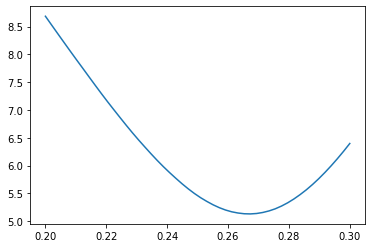

In [5]:
plt.plot(delays, res)

In [6]:
delays[res.argmin()]

0.2673469387755102

In [7]:
np.abs((delays - 0.214)).argmin()

7

In [8]:
res.min()

5.132003727823756

In [9]:
res.argmin()

33

26
[ 0.22613065  0.60301508  0.90452261  1.28140704  1.65829146  2.33668342
  2.63819095  3.31658291  3.69346734  4.14572864  4.59798995  6.18090452
  6.85929648  7.38693467  7.98994975  8.51758794  9.12060302  9.94974874
 10.1758794  10.85427136 11.6080402  12.21105528 12.36180905 12.96482412
 13.34170854 14.09547739]
['P11:LFIN', 'P11:RFIN']
Selected the option to not use the markers on the camera, the identity transformation will be used instead
['camera:cam_right              ' 'camera:cam_back               '
 'camera:cam_left               ' 'P11:LFHD                      '
 'P11:RFHD                      ' 'P11:LBHD                      '
 'P11:RBHD                      ' 'P11:C7                        '
 'P11:T10                       ' 'P11:CLAV                      '
 'P11:STRN                      ' 'P11:RBAK                      '
 'P11:LSHO                      ' 'P11:LUPA                      '
 'P11:LELB                      ' 'P11:LFRM                      '
 'P11:LWRA 

/home/schiavazza/.local/lib/python3.10/site-packages/c3d/c3d.py:1219: UserWarning: No analog data found in file.
  warnings.warn('No analog data found in file.')


times from dvs labels: [0.22613065326633164, 0.6030150753768844, 0.9045226130653266, 1.2814070351758793, 1.658291457286432, 2.336683417085427, 2.638190954773869, 3.316582914572864, 3.6934673366834168, 4.14572864321608, 4.597989949748744, 6.180904522613065, 6.859296482412059, 7.3869346733668335, 7.989949748743718, 8.517587939698492, 9.120603015075377, 9.949748743718592, 10.175879396984923, 10.854271356783919, 11.608040201005025, 12.21105527638191, 12.36180904522613, 12.964824120603014, 13.341708542713567, 14.095477386934672]
times from vicon labels: [ 0.22613065  0.60301508  0.90452261  1.28140704  1.65829146  2.33668342
  2.63819095  3.31658291  3.69346734  4.14572864  4.59798995  6.18090452
  6.85929648  7.38693467  7.98994975  8.51758794  9.12060302  9.94974874
 10.1758794  10.85427136 11.6080402  12.21105528 12.36180905 12.96482412
 13.34170854 14.09547739]
12.276520830799734
26
[ 0.22613065  0.60301508  0.90452261  1.28140704  1.65829146  2.33668342
  2.63819095  3.31658291  3.6934

/home/schiavazza/.local/lib/python3.10/site-packages/c3d/c3d.py:1219: UserWarning: No analog data found in file.
  warnings.warn('No analog data found in file.')


Selected the option to not use the markers on the camera, the identity transformation will be used instead
['camera:cam_right              ' 'camera:cam_back               '
 'camera:cam_left               ' 'P11:LFHD                      '
 'P11:RFHD                      ' 'P11:LBHD                      '
 'P11:RBHD                      ' 'P11:C7                        '
 'P11:T10                       ' 'P11:CLAV                      '
 'P11:STRN                      ' 'P11:RBAK                      '
 'P11:LSHO                      ' 'P11:LUPA                      '
 'P11:LELB                      ' 'P11:LFRM                      '
 'P11:LWRA                      ' 'P11:LWRB                      '
 'P11:LFIN                      ' 'P11:RSHO                      '
 'P11:RUPA                      ' 'P11:RELB                      '
 'P11:RFRM                      ' 'P11:RWRA                      '
 'P11:RWRB                      ' 'P11:RFIN                      '
 'P11:LASI            

/home/schiavazza/.local/lib/python3.10/site-packages/c3d/c3d.py:1219: UserWarning: No analog data found in file.
  warnings.warn('No analog data found in file.')


times from dvs labels: [0.22613065326633164, 0.6030150753768844, 0.9045226130653266, 1.2814070351758793, 1.658291457286432, 2.336683417085427, 2.638190954773869, 3.316582914572864, 3.6934673366834168, 4.14572864321608, 4.597989949748744, 6.180904522613065, 6.859296482412059, 7.3869346733668335, 7.989949748743718, 8.517587939698492, 9.120603015075377, 9.949748743718592, 10.175879396984923, 10.854271356783919, 11.608040201005025, 12.21105527638191, 12.36180904522613, 12.964824120603014, 13.341708542713567, 14.095477386934672]
times from vicon labels: [ 0.22613065  0.60301508  0.90452261  1.28140704  1.65829146  2.33668342
  2.63819095  3.31658291  3.69346734  4.14572864  4.59798995  6.18090452
  6.85929648  7.38693467  7.98994975  8.51758794  9.12060302  9.94974874
 10.1758794  10.85427136 11.6080402  12.21105528 12.36180905 12.96482412
 13.34170854 14.09547739]
12.276520830799734
26
[ 0.22613065  0.60301508  0.90452261  1.28140704  1.65829146  2.33668342
  2.63819095  3.31658291  3.6934

/home/schiavazza/.local/lib/python3.10/site-packages/c3d/c3d.py:1219: UserWarning: No analog data found in file.
  warnings.warn('No analog data found in file.')


times from dvs labels: [0.22613065326633164, 0.6030150753768844, 0.9045226130653266, 1.2814070351758793, 1.658291457286432, 2.336683417085427, 2.638190954773869, 3.316582914572864, 3.6934673366834168, 4.14572864321608, 4.597989949748744, 6.180904522613065, 6.859296482412059, 7.3869346733668335, 7.989949748743718, 8.517587939698492, 9.120603015075377, 9.949748743718592, 10.175879396984923, 10.854271356783919, 11.608040201005025, 12.21105527638191, 12.36180904522613, 12.964824120603014, 13.341708542713567, 14.095477386934672]
times from vicon labels: [ 0.22613065  0.60301508  0.90452261  1.28140704  1.65829146  2.33668342
  2.63819095  3.31658291  3.69346734  4.14572864  4.59798995  6.18090452
  6.85929648  7.38693467  7.98994975  8.51758794  9.12060302  9.94974874
 10.1758794  10.85427136 11.6080402  12.21105528 12.36180905 12.96482412
 13.34170854 14.09547739]
12.276520830799734
26
[ 0.22613065  0.60301508  0.90452261  1.28140704  1.65829146  2.33668342
  2.63819095  3.31658291  3.6934

/home/schiavazza/.local/lib/python3.10/site-packages/c3d/c3d.py:1219: UserWarning: No analog data found in file.
  warnings.warn('No analog data found in file.')


Selected the option to not use the markers on the camera, the identity transformation will be used instead
['camera:cam_right              ' 'camera:cam_back               '
 'camera:cam_left               ' 'P11:LFHD                      '
 'P11:RFHD                      ' 'P11:LBHD                      '
 'P11:RBHD                      ' 'P11:C7                        '
 'P11:T10                       ' 'P11:CLAV                      '
 'P11:STRN                      ' 'P11:RBAK                      '
 'P11:LSHO                      ' 'P11:LUPA                      '
 'P11:LELB                      ' 'P11:LFRM                      '
 'P11:LWRA                      ' 'P11:LWRB                      '
 'P11:LFIN                      ' 'P11:RSHO                      '
 'P11:RUPA                      ' 'P11:RELB                      '
 'P11:RFRM                      ' 'P11:RWRA                      '
 'P11:RWRB                      ' 'P11:RFIN                      '
 'P11:LASI            

/home/schiavazza/.local/lib/python3.10/site-packages/c3d/c3d.py:1219: UserWarning: No analog data found in file.
  warnings.warn('No analog data found in file.')


times from dvs labels: [0.22613065326633164, 0.6030150753768844, 0.9045226130653266, 1.2814070351758793, 1.658291457286432, 2.336683417085427, 2.638190954773869, 3.316582914572864, 3.6934673366834168, 4.14572864321608, 4.597989949748744, 6.180904522613065, 6.859296482412059, 7.3869346733668335, 7.989949748743718, 8.517587939698492, 9.120603015075377, 9.949748743718592, 10.175879396984923, 10.854271356783919, 11.608040201005025, 12.21105527638191, 12.36180904522613, 12.964824120603014, 13.341708542713567, 14.095477386934672]
times from vicon labels: [ 0.22613065  0.60301508  0.90452261  1.28140704  1.65829146  2.33668342
  2.63819095  3.31658291  3.69346734  4.14572864  4.59798995  6.18090452
  6.85929648  7.38693467  7.98994975  8.51758794  9.12060302  9.94974874
 10.1758794  10.85427136 11.6080402  12.21105528 12.36180905 12.96482412
 13.34170854 14.09547739]
12.276520830799734
26
[ 0.22613065  0.60301508  0.90452261  1.28140704  1.65829146  2.33668342
  2.63819095  3.31658291  3.6934

/home/schiavazza/.local/lib/python3.10/site-packages/c3d/c3d.py:1219: UserWarning: No analog data found in file.
  warnings.warn('No analog data found in file.')


times from dvs labels: [0.22613065326633164, 0.6030150753768844, 0.9045226130653266, 1.2814070351758793, 1.658291457286432, 2.336683417085427, 2.638190954773869, 3.316582914572864, 3.6934673366834168, 4.14572864321608, 4.597989949748744, 6.180904522613065, 6.859296482412059, 7.3869346733668335, 7.989949748743718, 8.517587939698492, 9.120603015075377, 9.949748743718592, 10.175879396984923, 10.854271356783919, 11.608040201005025, 12.21105527638191, 12.36180904522613, 12.964824120603014, 13.341708542713567, 14.095477386934672]
times from vicon labels: [ 0.22613065  0.60301508  0.90452261  1.28140704  1.65829146  2.33668342
  2.63819095  3.31658291  3.69346734  4.14572864  4.59798995  6.18090452
  6.85929648  7.38693467  7.98994975  8.51758794  9.12060302  9.94974874
 10.1758794  10.85427136 11.6080402  12.21105528 12.36180905 12.96482412
 13.34170854 14.09547739]
12.276520830799734
26
[ 0.22613065  0.60301508  0.90452261  1.28140704  1.65829146  2.33668342
  2.63819095  3.31658291  3.6934

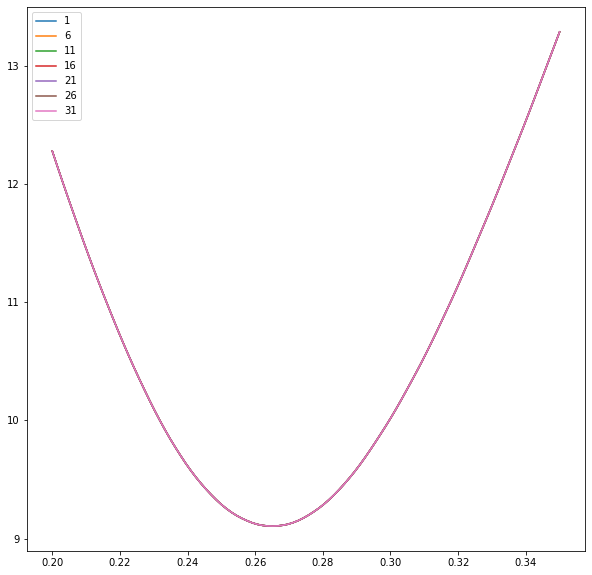

In [10]:
plt.figure(figsize=(10, 10))
for i in np.arange(1, 33, 5):
    res, delays = opt_delay(i)
    plt.plot(delays, res, label=f"{i}")
    print(i)
plt.legend()